# EDA 
For EDA analysis, we will use data from GCP

In [1]:
from google.cloud import bigquery
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


client = bigquery.Client(project='crmhetic')

In [2]:
query_account=""" select * from `crmhetic.raw_data.accounts` """
query_job = client.query(query_account)
results = query_job.result()
# to dataframe
df_account = results.to_dataframe()

query_products=""" select * from `crmhetic.raw_data.products` """
query_job = client.query(query_products)
results = query_job.result()
df_products = results.to_dataframe()
query_sales_pepline=""" select * from `crmhetic.raw_data.sales_pepline` """
query_job = client.query(query_sales_pepline)
results = query_job.result()
df_sales_pipeline = results.to_dataframe()


/Users/camille/repo/Hetic/repo_M2/eval_certifiante/etl/dbt_crm_venv/lib/python3.13/site-packages/google/cloud/bigquery/table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


### Account
On this part 

In [3]:
#Nb sector 
df_account['sector'].value_counts()

sector
retail                17
medical               12
technolgy             12
finance                8
marketing              8
software               7
entertainment          6
telecommunications     6
services               5
employment             4
Name: count, dtype: int64

In [4]:
df_account['office_location'].value_counts()

office_location
United States    71
Japan             1
Italy             1
Belgium           1
Romania           1
Kenya             1
Philipines        1
Germany           1
Jordan            1
Poland            1
Norway            1
Korea             1
Panama            1
China             1
Brazil            1
Name: count, dtype: int64

<Figure size 1000x600 with 0 Axes>

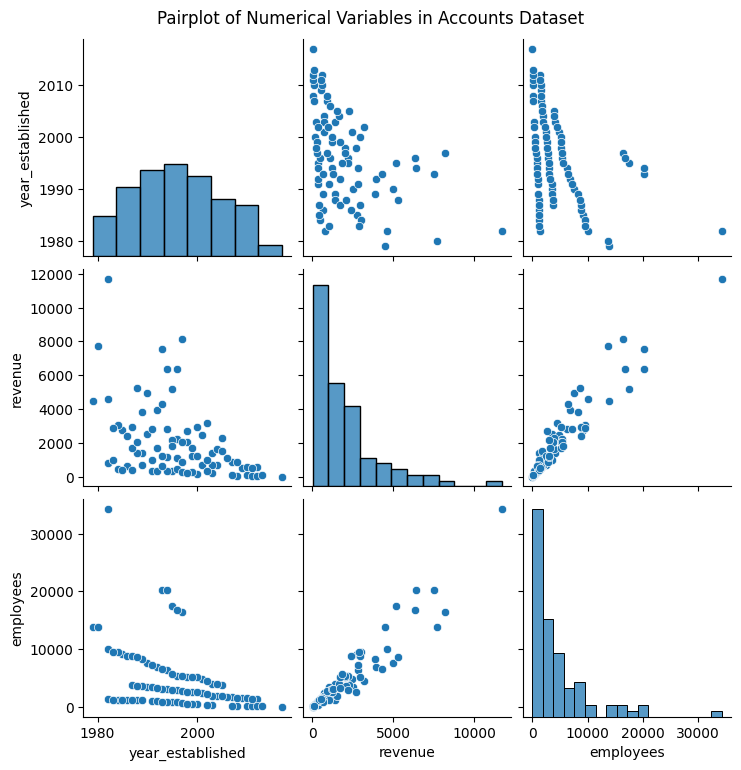

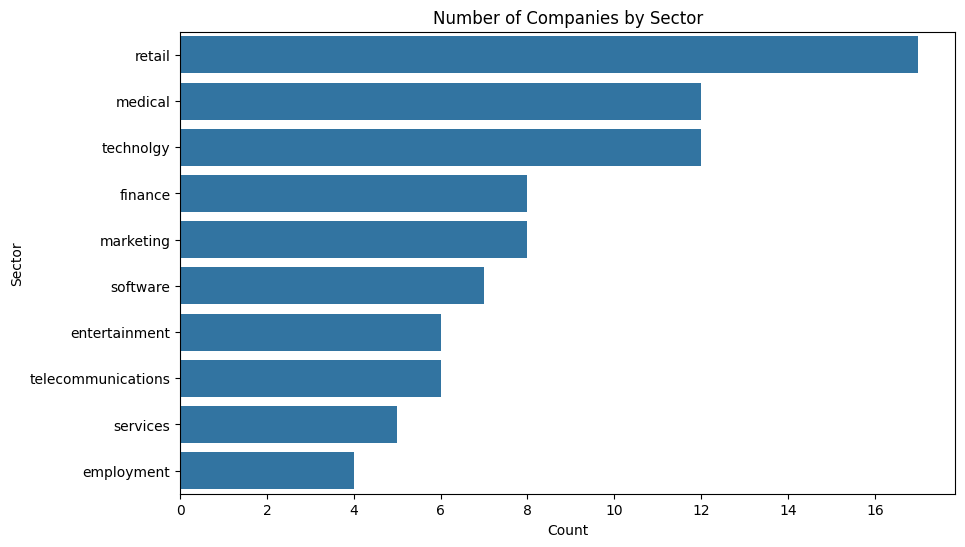

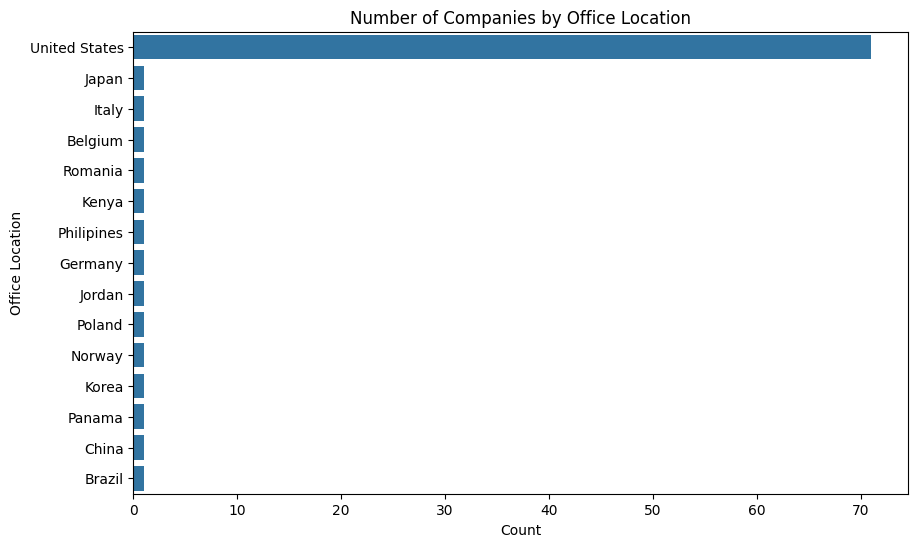

Employees Statistics:
 count           85.0
mean     4660.823529
std      5715.601198
min              9.0
25%           1179.0
50%           2769.0
75%           5595.0
max          34288.0
Name: employees, dtype: Float64 



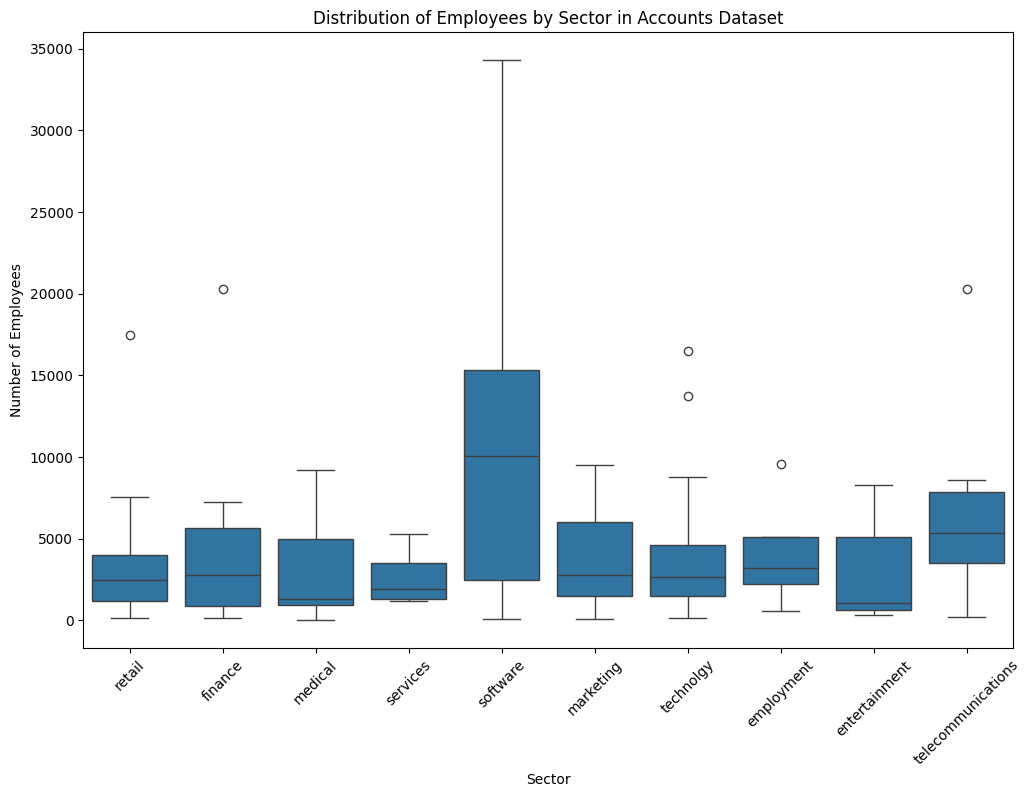

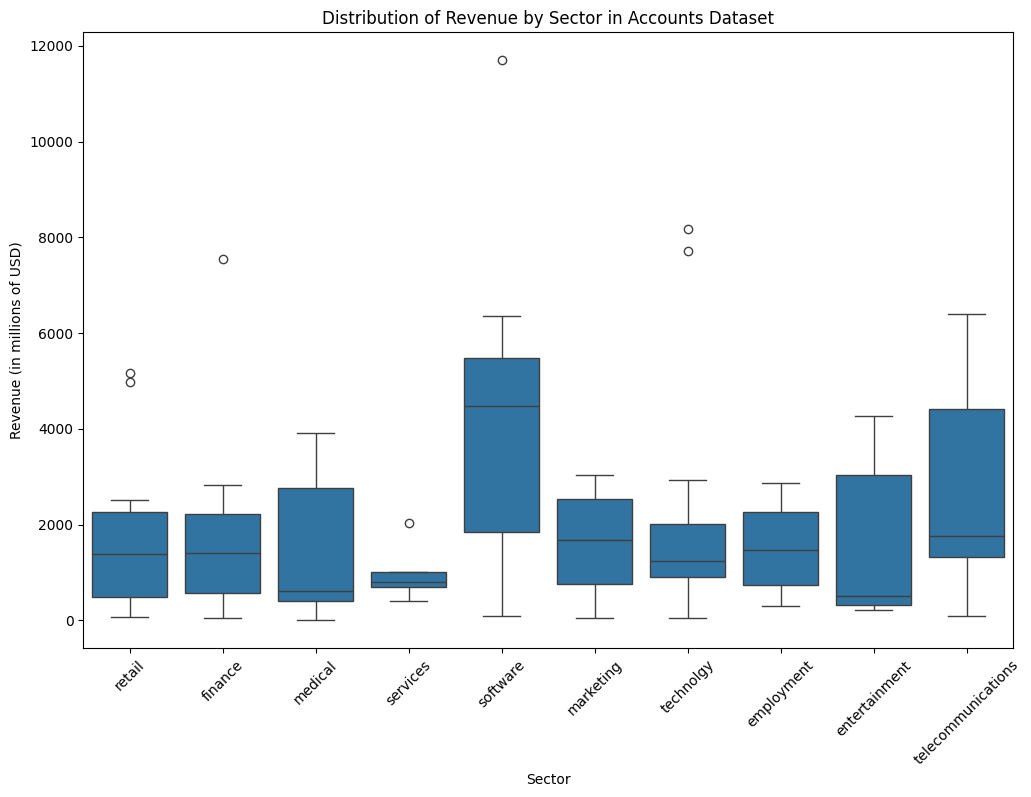

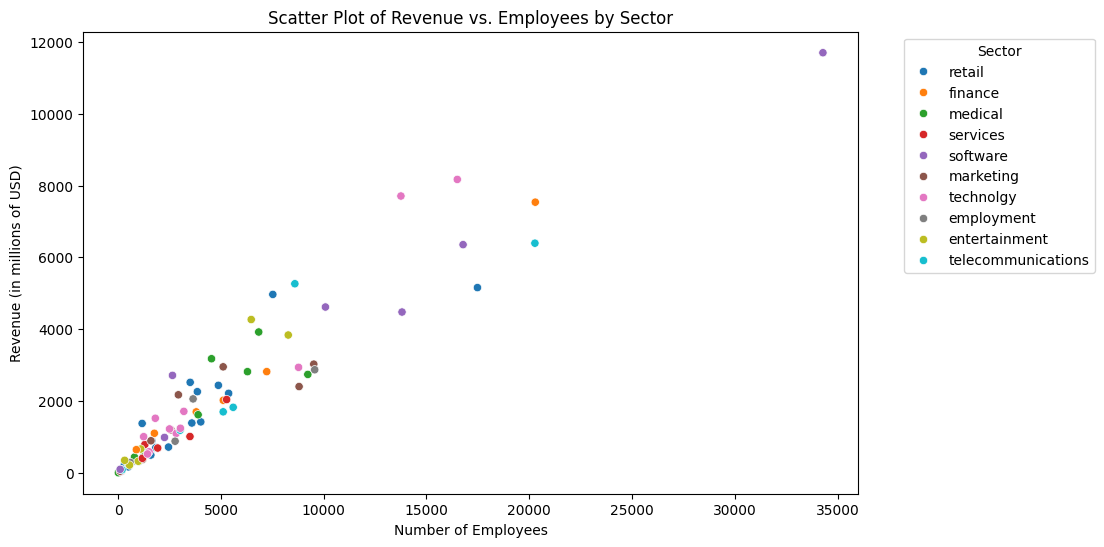

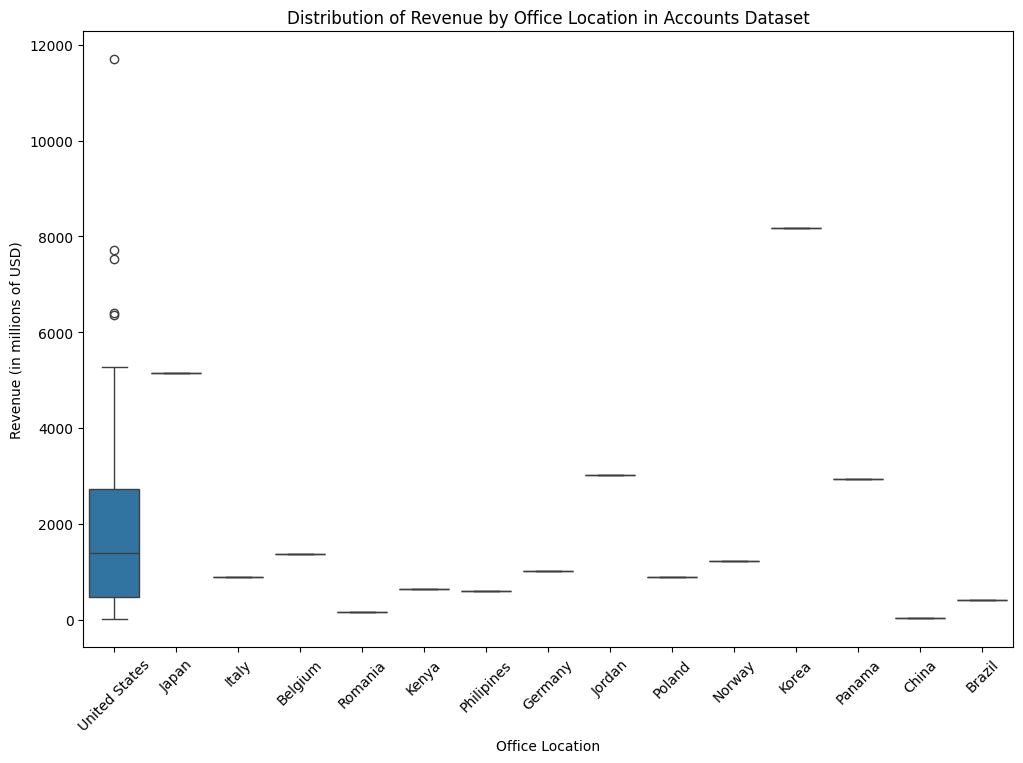

In [5]:
plt.figure(figsize=(10, 6))
sns.pairplot(df_account)
plt.suptitle("Pairplot of Numerical Variables in Accounts Dataset", y=1.02)
plt.show()

# Count of companies per sector
plt.figure(figsize=(10, 6))
sns.countplot(y=df_account['sector'], order=df_account['sector'].value_counts().index)
plt.title("Number of Companies by Sector")
plt.xlabel("Count")
plt.ylabel("Sector")
plt.show()

# Count of companies per office location
plt.figure(figsize=(10, 6))
sns.countplot(y=df_account['office_location'], order=df_account['office_location'].value_counts().index)
plt.title("Number of Companies by Office Location")
plt.xlabel("Count")
plt.ylabel("Office Location")
plt.show()

# Displaying basic descriptive statistics for 'employees'
print("Employees Statistics:\n", df_account['employees'].describe(), "\n")

# Boxplot to show distribution of employees by sector
plt.figure(figsize=(12, 8))
sns.boxplot(x='sector', y='employees', data=df_account)
plt.title("Distribution of Employees by Sector in Accounts Dataset")
plt.xlabel("Sector")
plt.ylabel("Number of Employees")
plt.xticks(rotation=45)
plt.show()

# Boxplot to show distribution of revenue by sector
plt.figure(figsize=(12, 8))
sns.boxplot(x='sector', y='revenue', data=df_account)
plt.title("Distribution of Revenue by Sector in Accounts Dataset")
plt.xlabel("Sector")
plt.ylabel("Revenue (in millions of USD)")
plt.xticks(rotation=45)
plt.show()

# New Visualization: Scatter plot for Employees vs. Revenue to explore correlation
plt.figure(figsize=(10, 6))
sns.scatterplot(x='employees', y='revenue', hue='sector', data=df_account)
plt.title("Scatter Plot of Revenue vs. Employees by Sector")
plt.xlabel("Number of Employees")
plt.ylabel("Revenue (in millions of USD)")
plt.legend(title='Sector', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# New Visualization: Revenue Distribution by Office Location (for a regional view)
plt.figure(figsize=(12, 8))
sns.boxplot(x='office_location', y='revenue', data=df_account)
plt.title("Distribution of Revenue by Office Location in Accounts Dataset")
plt.xlabel("Office Location")
plt.ylabel("Revenue (in millions of USD)")
plt.xticks(rotation=45)
plt.show()

## Sales Data

In [28]:
print("Basic Information:")
df_sales_pipeline.info()

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8800 entries, 0 to 8799
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   opportunity_id  8800 non-null   object        
 1   sales_agent     8800 non-null   object        
 2   product         8800 non-null   object        
 3   account         7375 non-null   object        
 4   deal_stage      8800 non-null   object        
 5   engage_date     8300 non-null   datetime64[ns]
 6   close_date      6711 non-null   datetime64[ns]
 7   close_value     6711 non-null   Int64         
 8   duration        6711 non-null   float64       
 9   month_year      8300 non-null   datetime64[ns]
dtypes: Int64(1), datetime64[ns](3), float64(1), object(5)
memory usage: 696.2+ KB


In [30]:
print("Summary Statistics:")
df_sales_pipeline.describe()

Summary Statistics:


,engage_date,close_date,close_value,duration,month_year
count,8300,6711,6711.0,6711.000000,8300
mean,2017-06-14 08:35:06.216867328,2017-08-01 03:32:25.641484288,1490.915512,47.985397,2017-05-30 12:36:26.024096
min,2016-10-20 00:00:00,2017-03-01 00:00:00,0.0,1.000000,2016-10-01 00:00:00
25%,2017-04-04 00:00:00,2017-05-18 00:00:00,0.0,8.000000,2017-04-01 00:00:00
50%,2017-06-24 00:00:00,2017-08-02 00:00:00,472.0,45.000000,2017-06-01 00:00:00
75%,2017-08-27 00:00:00,2017-10-18 00:00:00,3225.0,85.000000,2017-08-01 00:00:00
max,2017-12-27 00:00:00,2017-12-31 00:00:00,30288.0,138.000000,2017-12-01 00:00:00
std,NaN,NaN,2320.670773,41.057665,NaN


In [31]:
print("Missing Values:")
df_sales_pipeline.isnull().sum()

Missing Values:


opportunity_id       0
sales_agent          0
product              0
account           1425
deal_stage           0
engage_date        500
close_date        2089
close_value       2089
duration          2089
month_year         500
dtype: int64

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8800 entries, 0 to 8799
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   opportunity_id  8800 non-null   object        
 1   sales_agent     8800 non-null   object        
 2   product         8800 non-null   object        
 3   account         7375 non-null   object        
 4   deal_stage      8800 non-null   object        
 5   engage_date     8300 non-null   datetime64[ns]
 6   close_date      6711 non-null   datetime64[ns]
 7   close_value     6711 non-null   Int64         
 8   duration        6711 non-null   float64       
 9   month_year      8300 non-null   datetime64[ns]
dtypes: Int64(1), datetime64[ns](3), float64(1), object(5)
memory usage: 696.2+ KB
Summary Statistics:
Missing Values:


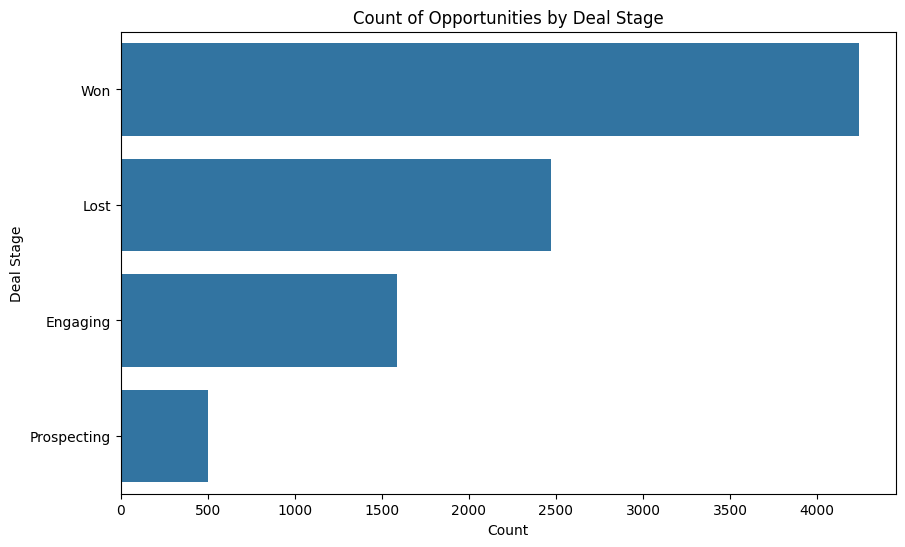

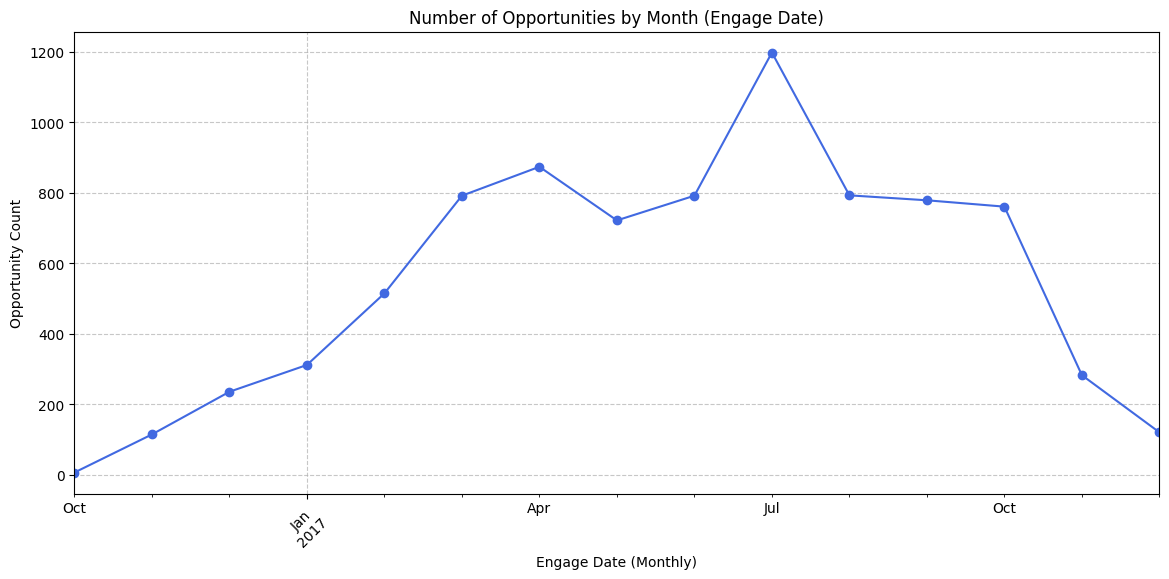

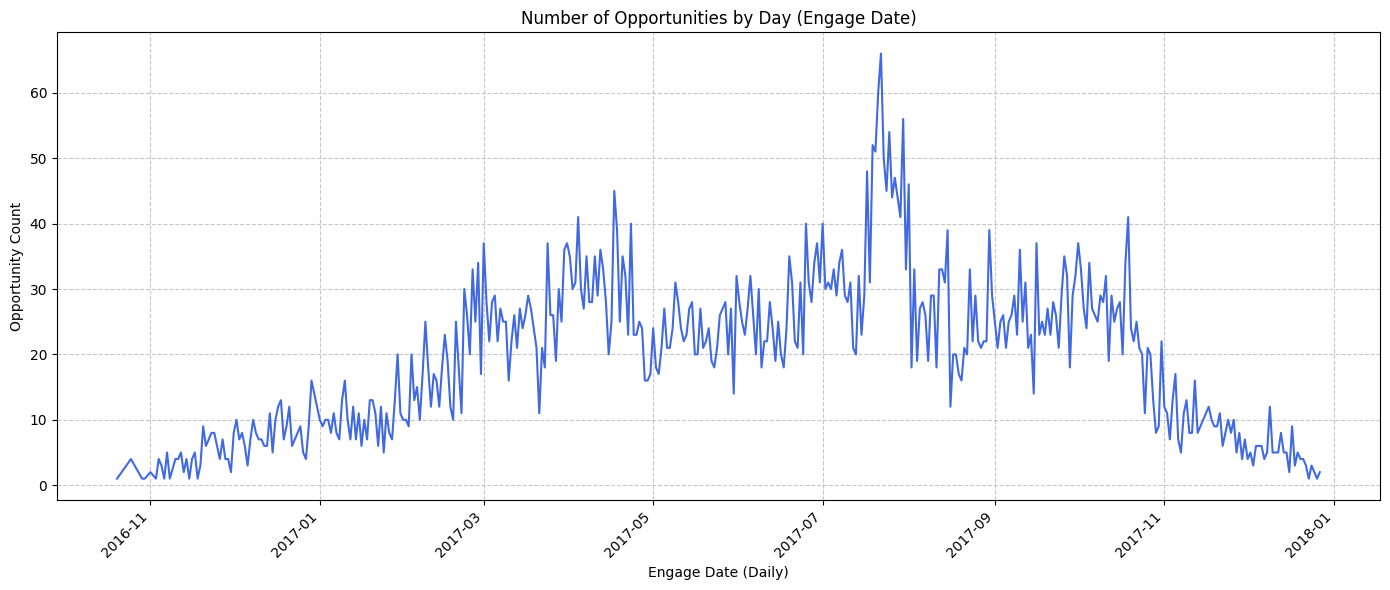

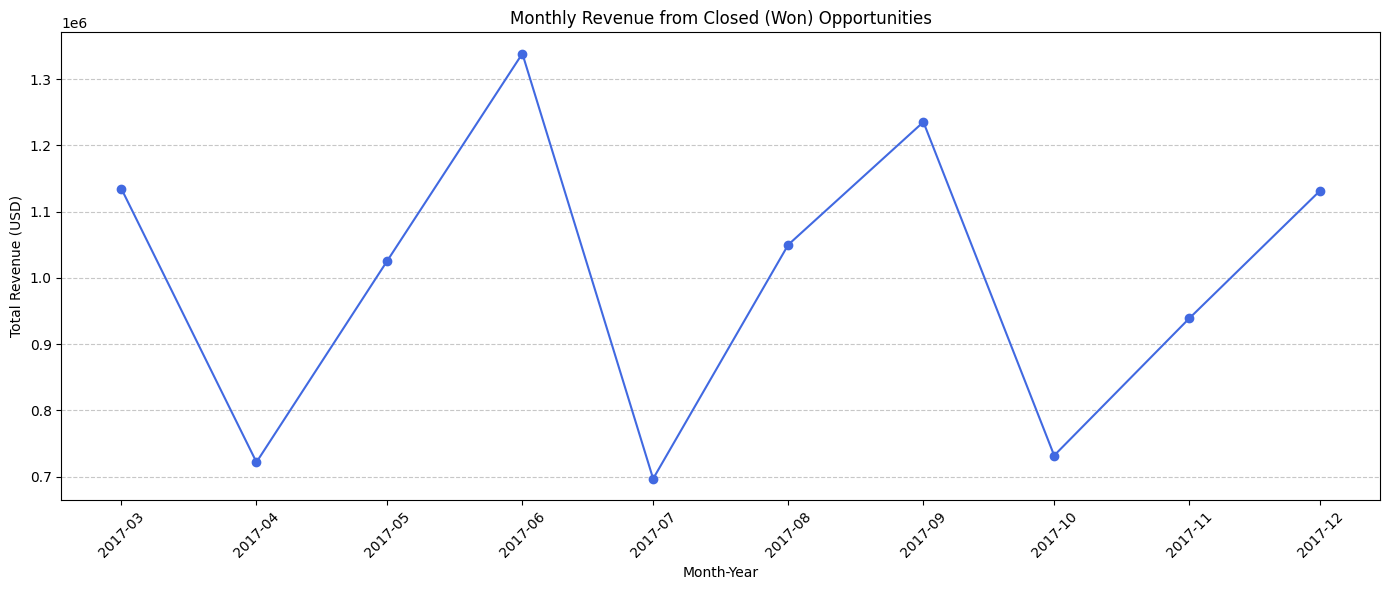

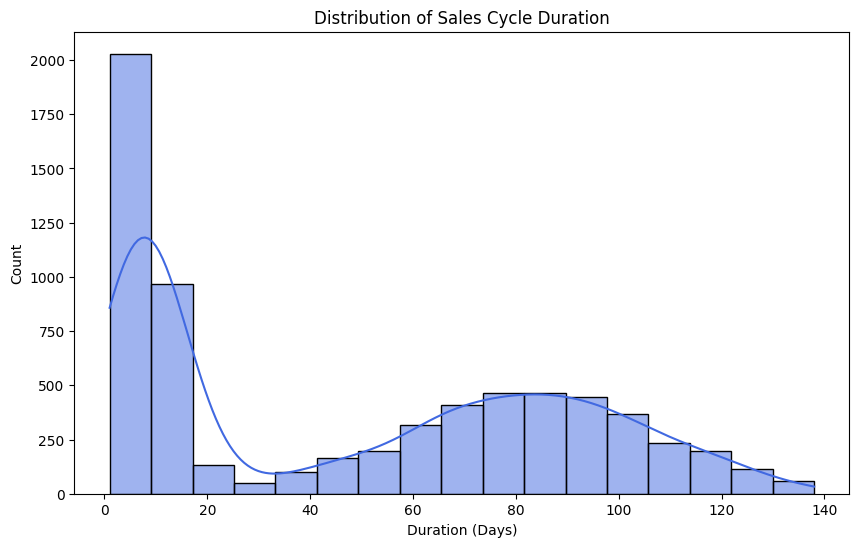

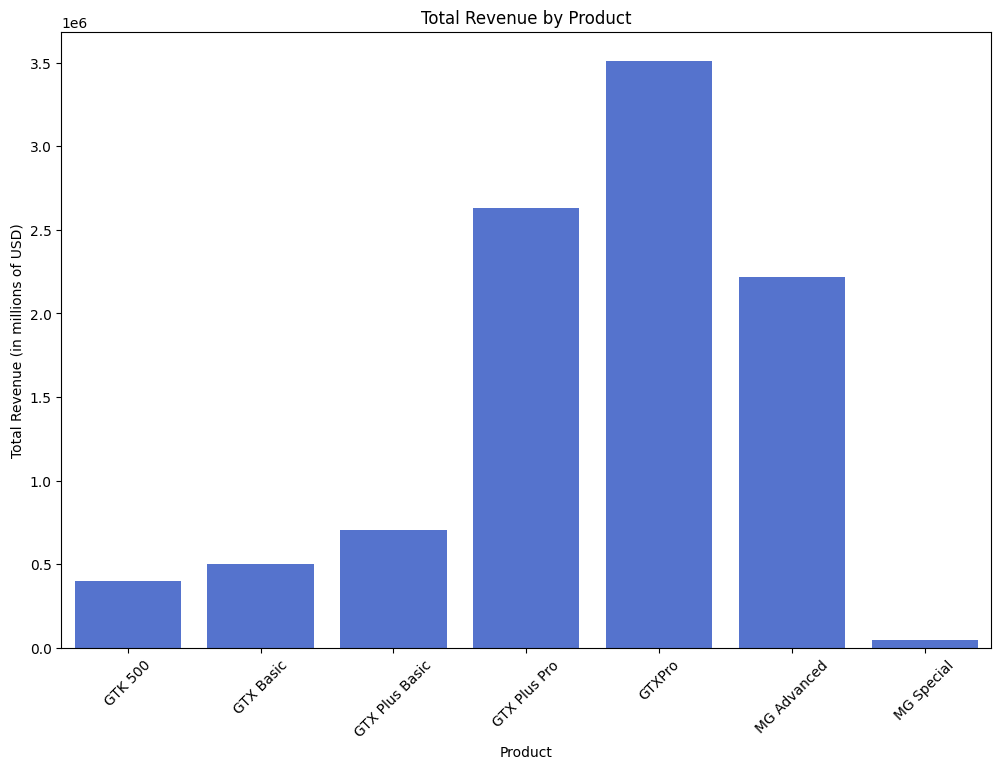

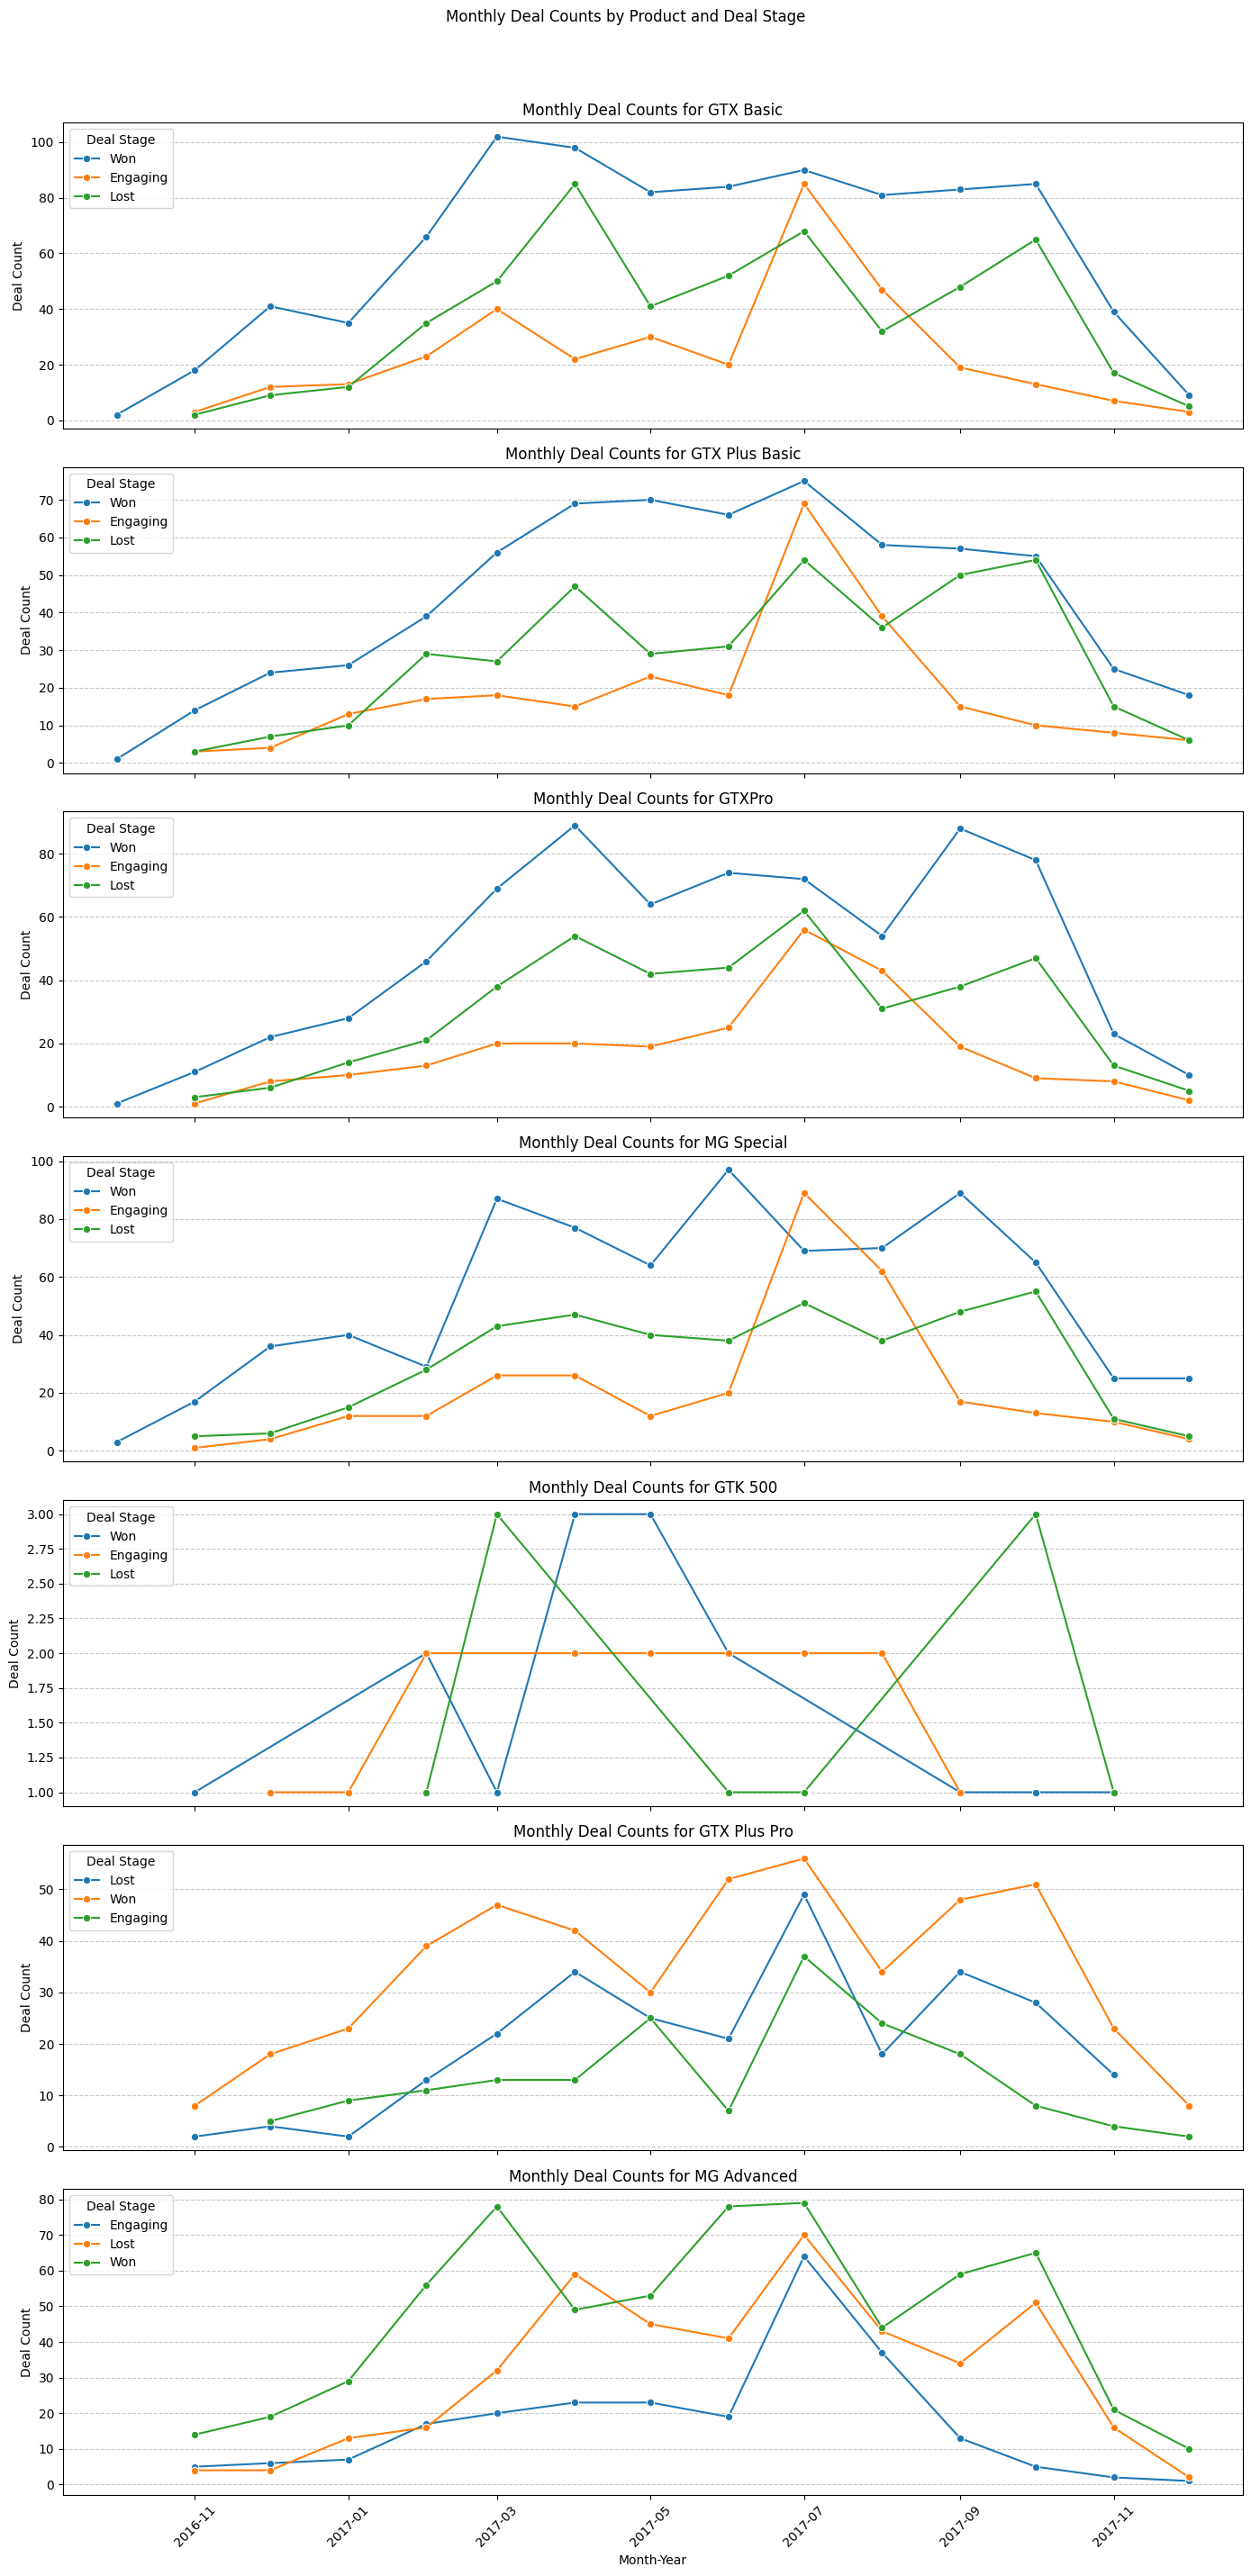

Top 10 Sales Agents by Won Deals and Revenue:


,sales_agent,total_won_deals,total_revenue
0,Darcel Schlecht,349,1153214
1,Vicki Laflamme,221,478396
2,Kary Hendrixson,209,454298
3,Anna Snelling,208,275056
4,Versie Hillebrand,176,187693
5,Kami Bicknell,174,316456
6,Jonathan Berthelot,171,284886
7,Cassey Cress,163,450489
8,Zane Levy,161,430068
9,Donn Cantrell,158,445860


In [ ]:
# Step 1: Distribution of Deal Stages
plt.figure(figsize=(10, 6))
sns.countplot(y='deal_stage', data=df_sales_pipeline, order=df_sales_pipeline['deal_stage'].value_counts().index)
plt.title("Count of Opportunities by Deal Stage")
plt.xlabel("Count")
plt.ylabel("Deal Stage")
plt.show()

# Convert engage_date to datetime for time-based analysis
df_sales_pipeline['engage_date'] = pd.to_datetime(df_sales_pipeline['engage_date'], errors='coerce')

# Step 2: Monthly Opportunity Counts
plt.figure(figsize=(14, 6))
monthly_opportunities = df_sales_pipeline['engage_date'].dt.to_period('M').value_counts().sort_index()
monthly_opportunities.plot(kind='line', marker='o', linestyle='-', color='royalblue')
plt.title("Number of Opportunities by Month (Engage Date)")
plt.xlabel("Engage Date (Monthly)")
plt.ylabel("Opportunity Count")
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

# Step 3: Daily Opportunity Counts
plt.figure(figsize=(14, 6))
daily_opportunities = df_sales_pipeline['engage_date'].value_counts().sort_index()
daily_opportunities.plot(kind='line', color='royalblue')
plt.title("Number of Opportunities by Day (Engage Date)")
plt.xlabel("Engage Date (Daily)")
plt.ylabel("Opportunity Count")
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 4: Monthly Revenue for Won Deals
df_sales_pipeline['close_date'] = pd.to_datetime(df_sales_pipeline['close_date'], errors='coerce')
won_deals = df_sales_pipeline[df_sales_pipeline['deal_stage'] == 'Won']
monthly_revenue_won = won_deals.groupby(won_deals['close_date'].dt.to_period('M')).agg(total_revenue=('close_value', 'sum')).reset_index()
monthly_revenue_won['close_date'] = monthly_revenue_won['close_date'].dt.to_timestamp()

plt.figure(figsize=(14, 6))
plt.plot(monthly_revenue_won['close_date'], monthly_revenue_won['total_revenue'], marker='o', linestyle='-', color='royalblue')
plt.title("Monthly Revenue from Closed (Won) Opportunities")
plt.xlabel("Month-Year")
plt.ylabel("Total Revenue (USD)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 5: Duration Distribution of Sales Cycles
df_sales_pipeline['duration'] = (df_sales_pipeline['close_date'] - df_sales_pipeline['engage_date']).dt.days

plt.figure(figsize=(10, 6))
sns.histplot(df_sales_pipeline['duration'].dropna(), kde=True, color='royalblue')
plt.title("Distribution of Sales Cycle Duration")
plt.xlabel("Duration (Days)")
plt.ylabel("Count")
plt.show()

# Step 6: Total Revenue by Product
product_revenue = df_sales_pipeline.groupby('product')['close_value'].sum().reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(x='product', y='close_value', data=product_revenue, color='royalblue')
plt.title("Total Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Total Revenue (in millions of USD)")
plt.xticks(rotation=45)
plt.show()

# Step 7: Monthly Deal Counts by Product and Deal Stage
df_sales_pipeline['month_year'] = df_sales_pipeline['engage_date'].dt.to_period('M').dt.to_timestamp()
monthly_deals = df_sales_pipeline.groupby(['month_year', 'product', 'deal_stage']).size().reset_index(name='deal_count')
unique_products = monthly_deals['product'].unique()
num_products = len(unique_products)

fig, axes = plt.subplots(num_products, 1, figsize=(14, num_products * 4), sharex=True)

for i, product in enumerate(unique_products):
    product_data = monthly_deals[monthly_deals['product'] == product]
    sns.lineplot(data=product_data, x='month_year', y='deal_count', hue='deal_stage', ax=axes[i], marker="o")
    axes[i].set_title(f"Monthly Deal Counts for {product}")
    axes[i].set_xlabel("Month-Year")
    axes[i].set_ylabel("Deal Count")
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)
    axes[i].legend(title="Deal Stage", loc='upper left')

plt.suptitle("Monthly Deal Counts by Product and Deal Stage", y=1.02)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 8: Top Sales Agents by Won Deals and Revenue
agent_won_stats = won_deals.groupby('sales_agent').agg(
    total_won_deals=('deal_stage', 'count'),
    total_revenue=('close_value', 'sum')
).sort_values(by='total_won_deals', ascending=False).reset_index()

# Display the top 10 agents by won deals
print("Top 10 Sales Agents by Won Deals and Revenue:")
agent_won_stats.head(10)

In [32]:
df_sales_pipeline

,opportunity_id,sales_agent,product,account,deal_stage,engage_date,close_date,close_value,duration,month_year
0,Z063OYW0,Darcel Schlecht,GTXPro,Isdom,Won,2016-10-25,2017-03-11,4514,137.0,2016-10-01
1,KNY1OSAB,Maureen Marcano,GTXPro,Labdrill,Won,2016-11-11,2017-03-14,4899,123.0,2016-11-01
2,JYKM0B00,James Ascencio,GTXPro,Xx-holding,Won,2016-11-12,2017-03-06,4338,114.0,2016-11-01
3,LPKT07PV,Boris Faz,GTXPro,Opentech,Won,2016-11-20,2017-03-23,4704,123.0,2016-11-01
4,GIUUTBXM,Kary Hendrixson,GTXPro,Y-corporation,Won,2016-11-21,2017-03-14,5539,113.0,2016-11-01
...,...,...,...,...,...,...,...,...,...,...
8795,PVZ4YGQG,Donn Cantrell,GTX Plus Basic,Donware,Lost,2017-12-02,2017-12-11,0,9.0,2017-12-01
8796,1WVEAE8N,Jonathan Berthelot,GTX Plus Basic,Codehow,Lost,2017-12-03,2017-12-20,0,17.0,2017-12-01
8797,EY0JZ32S,Corliss Cosme,GTX Plus Basic,Zotware,Lost,2017-12-05,2017-12-27,0,22.0,2017-12-01
8798,LE3XYXEF,Reed Clapper,GTX Plus Basic,Ganjaflex,Lost,2017-12-12,2017-12-25,0,13.0,2017-12-01


### sales_profitability

In [33]:
query_sales_profitability=""" select * from `crmhetic.crmhetic_silver.sales_profitability` """
query_job = client.query(query_sales_profitability)
results = query_job.result()
# to dataframe
df_sales_profitability = results.to_dataframe()

/Users/camille/repo/Hetic/repo_M2/eval_certifiante/etl/dbt_crm_venv/lib/python3.13/site-packages/google/cloud/bigquery/table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [34]:
# Separate Won and Lost deals
won_deals = df_sales_profitability[df_sales_profitability['deal_stage'] == 'Won']
lost_deals = df_sales_profitability[df_sales_profitability['deal_stage'] == 'Lost']

KeyError: 'deal_stage'

In [ ]:
# Descriptive statistics for Won and Lost deals
won_stats = won_deals[['sales_margin', 'sales_cycle_days', 'close_value']].describe()
lost_stats = lost_deals[['sales_margin', 'sales_cycle_days', 'close_value']].describe()

print("Descriptive Statistics for Won Deals:\n", won_stats)
print("\nDescriptive Statistics for Lost Deals:\n", lost_stats)

In [ ]:
# Group by product and deal stage to analyze revenue and margin
product_stage_stats = df_sales_profitability.groupby(['product', 'deal_stage']).agg(
    total_revenue=('close_value', 'sum'),
    average_margin=('sales_margin', 'mean'),
    deal_count=('deal_stage', 'count')
).reset_index()

print("Revenue and Margin Analysis by Product and Deal Stage:\n", product_stage_stats)

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='deal_stage', y='sales_margin', data=df, palette="coolwarm")
plt.title("Sales Margin Distribution by Deal Stage")
plt.xlabel("Deal Stage")
plt.ylabel("Sales Margin")
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='deal_stage', y='sales_cycle_days', data=df, palette="Set2")
plt.title("Sales Cycle Duration by Deal Stage")
plt.xlabel("Deal Stage")
plt.ylabel("Sales Cycle Duration (Days)")
plt.show()

In [ ]:
plt.figure(figsize=(14, 8))
sns.barplot(x='total_revenue', y='product', hue='deal_stage', data=product_stage_stats, palette="viridis")
plt.title("Total Revenue by Product for Won and Lost Deals")
plt.xlabel("Total Revenue")
plt.ylabel("Product")
plt.legend(title="Deal Stage", loc="upper right")
plt.show()